# Lending Club data Case Study

Case Study submitted by:

            Mandheer Singh - Group Facilitator
            Kailash Mirani - Group Member

# 1.Data Loading and preparation

In [1]:
#reading data to the data frame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
pd.options.display.max_columns = None
pd.set_option("max_rows", None)
sns.set(style='whitegrid')
path=r'loan.csv'
loan=pd.read_csv(path,encoding = "ISO-8859-1",low_memory=False)

In [2]:
loan.shape

(39717, 111)

In [3]:
#finding empty rows
loan.loc[loan.isnull().all(axis=1)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [4]:
#so there were no empty rows
# finding blank columns
blank_cols =[col for col in loan.columns if loan[col].isnull().all(axis=0)]
print(blank_cols,len(blank_cols))

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [5]:
#so there are 54 columns where there is no values lets get rid of those columns
loan.drop(blank_cols,axis=1,inplace=True)

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [7]:
#now removing irrelevant or redundant or insignificant columns
extra_cols=['pymnt_plan','url','zip_code','initial_list_status','application_type','next_pymnt_d',
            'collections_12_mths_ex_med','policy_code','acc_now_delinq',
            'chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','delinq_2yrs','earliest_cr_line',
           'inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','total_acc','pub_rec','revol_bal',
           'revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
            'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
            'last_credit_pull_d','desc'
           ]
loan.drop(extra_cols,axis=1,inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  emp_title            37258 non-null  object 
 11  emp_length           38642 non-null  object 
 12  home_ownership       39717 non-null  object 
 13  annual_inc           39717 non-null  float64
 14  verification_status  39717 non-null  object 
 15  issue_d              39717 non-null 

All the consumer behavior columns/columns with same values for all/ unimportant coloumns have been deleted.

In [8]:
#we can see that there are some the missing values exists in the data but most of them are categorical variables
loan.loc[loan['emp_title'].isnull(),'emp_title']='Blank'
loan.loc[loan['emp_length'].isnull(),'emp_length']='Blank'
loan.loc[loan['title'].isnull(),'title']='Blank'

Missing values for categorical variables can be handled using mode or some more sophisticated methods but here we choose them to replace with word 'Blank' and we can analyize it as a separate category

In [9]:
#next we want to change the type of columns in date time where necessary
import datetime as dt
loan['issue_d']=pd.to_datetime(loan['issue_d'],format='%b-%y')


In [10]:
#changing some more data types for columns
loan[['id','member_id']]=loan[['id','member_id']].astype(str)

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   39717 non-null  object        
 1   member_id            39717 non-null  object        
 2   loan_amnt            39717 non-null  int64         
 3   funded_amnt          39717 non-null  int64         
 4   funded_amnt_inv      39717 non-null  float64       
 5   term                 39717 non-null  object        
 6   int_rate             39717 non-null  object        
 7   installment          39717 non-null  float64       
 8   grade                39717 non-null  object        
 9   sub_grade            39717 non-null  object        
 10  emp_title            39717 non-null  object        
 11  emp_length           39717 non-null  object        
 12  home_ownership       39717 non-null  object        
 13  annual_inc           39717 non-

In [12]:
#Checking count of defaulters and non deafaulters
loan.groupby('loan_status')['id'].count()

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
Name: id, dtype: int64

In [13]:
#filtering out the rows with loan_status as current
loan=loan[~(loan['loan_status']=='Current')]

Loan status 'Current is not relevant for this study'

In [14]:
loan.shape
loan.groupby('loan_status')['id'].count()

loan_status
Charged Off     5627
Fully Paid     32950
Name: id, dtype: int64

In [15]:
#lets convert the annual income into mothly income to compare easily
loan['monthly_income']=loan['annual_inc']/12
loan.drop('annual_inc',axis=1,inplace=True)
#now convert int_rate to equivalent decimals
loan['int_rate']=loan['int_rate'].str.rstrip('%').astype(float)

We have created a column called 'monthly_income' and dropped 'annual_inc' column.
we converted int_rate column to numeric data type

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39715
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   38577 non-null  object        
 1   member_id            38577 non-null  object        
 2   loan_amnt            38577 non-null  int64         
 3   funded_amnt          38577 non-null  int64         
 4   funded_amnt_inv      38577 non-null  float64       
 5   term                 38577 non-null  object        
 6   int_rate             38577 non-null  float64       
 7   installment          38577 non-null  float64       
 8   grade                38577 non-null  object        
 9   sub_grade            38577 non-null  object        
 10  emp_title            38577 non-null  object        
 11  emp_length           38577 non-null  object        
 12  home_ownership       38577 non-null  object        
 13  verification_status  38577 non-

In [17]:
loan['emp_title']=loan['emp_title'].str.lower()
loan['title']=loan['title'].str.lower()
loan['purpose']=loan['purpose'].str.lower()

We convereted above columns to lower case to avoid  conflicts

In [18]:
import datetime as dt
loan['issue_year']=pd.DatetimeIndex(loan['issue_d']).year
loan['issue_month']=pd.DatetimeIndex(loan['issue_d']).month
loan['int_rate_cat']=loan['int_rate'].apply(lambda x:'lower' if x<10  else ('medium' if 10<=x<=15 else 'upper'))
loan['dti_cat']=loan['dti'].apply(lambda x:'lower' if x<10  else ('medium' if 10<=x<=20 else 'upper'))

- Converting interest rate and dti columns to categorical values
- Creating  dervied metrics for analysis
- issue_year,issue_month,int_rate_cat,dti_cat

In [19]:
loan.loc[loan['title'].str.contains('consolidation'),'title']='debt_consolidation'

Fixing title column it has many categories with debt consolidation various spelling so converting them into one category

In [20]:
loan.loc[loan['home_ownership']=='NONE','home_ownership']='OTHER'
#This column has three observations with NONE so imputing them with other

## Univariate analysis

In [21]:
loan.loc[loan['loan_status']=='Charged Off','loan_status']=1
loan.loc[loan['loan_status']=='Fully Paid','loan_status']=0
loan['loan_status']=loan['loan_status'].astype(int)

We changed our target variable to numeric 1 means defaulter and 0 means non_defaulter

In [22]:
#glancing each column one by one
for c in loan.columns:
    print(c,"-",loan[c].describe())
    print()

id - count      38577
unique     38577
top       842456
freq           1
Name: id, dtype: object

member_id - count      38577
unique     38577
top       708474
freq           1
Name: member_id, dtype: object

loan_amnt - count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

funded_amnt - count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

funded_amnt_inv - count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

term - count          38577
unique             2
top        36 months
freq           29096
Name: term, dtype: o

In [23]:
#taking a glance by plotting box plot

attr=['loan_amnt','funded_amnt','funded_amnt_inv']
def make_box(attr):
    data=[loan[c] for c in attr]
    fig = plt.figure(figsize=(9, 6))

    # Plotting a box plot 
    bp = plt.boxplot(data, patch_artist=True, labels=attr)


    for box in bp['boxes']:
        box.set(color='#7570b3', linewidth=2)
        box.set(facecolor = '#1b9e77')

    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    for flier in bp['fliers']:
        flier.set(marker='p', color='r', alpha=0.5)
    fig.savefig('loan_boxplot.png')
    plt.show()

We have created a function to make box plot which takes feature or list of features and make a box plot

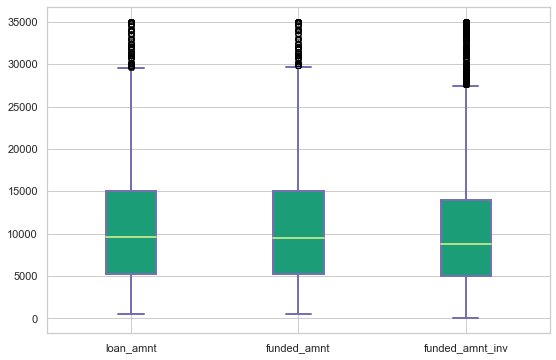

In [24]:
make_box(attr)

- Presented variables are in similar range
- Against funded amount inv, loan amount is   littile more
- Investers are not lending full amount 
- They are investing lesser than recommended by LC in most of the cases

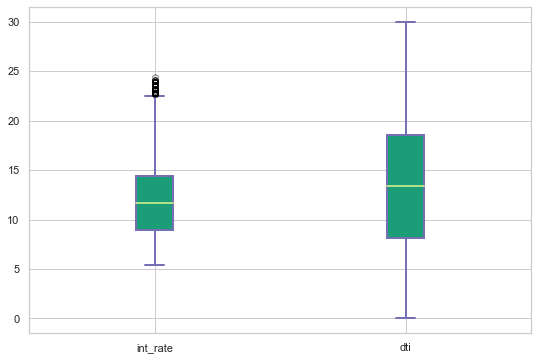

In [25]:
make_box(['int_rate','dti'])

- We can see ranges of int_rate and dti
- Median for int_rate is around 12 and for dti it is around 14

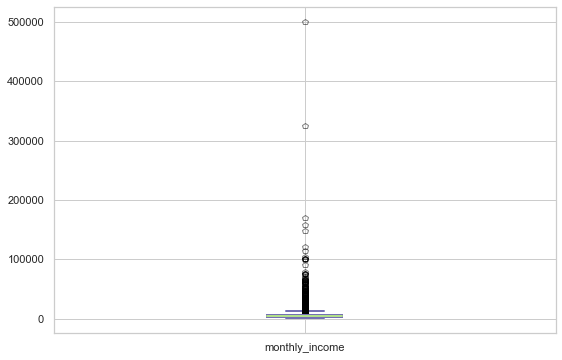

In [26]:
make_box(['monthly_income'])

Monthly Income has lot of outliers

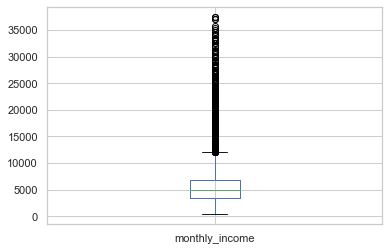

In [27]:
loan.loc[loan['monthly_income']<40000,'monthly_income'].plot(kind='box')

Still there are lot of outliers in monthly income column

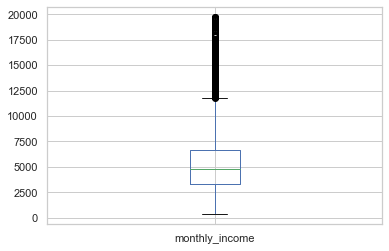

In [28]:
loan.loc[loan['monthly_income']<20000,'monthly_income'].plot(kind='box')

median income is around 5000 per month

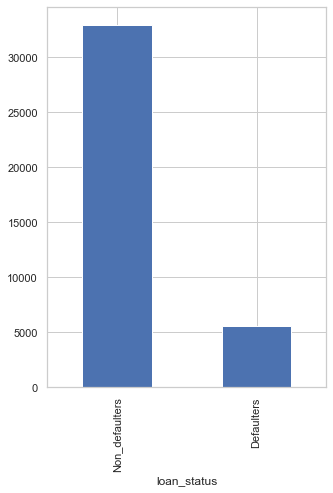

In [29]:
plt.figure(figsize=(5,7))
ax=loan.groupby('loan_status')['loan_status'].count().plot(kind='bar')
ax.set_xticklabels(['Non_defaulters','Defaulters'])
plt.show()

Above plot shows the frequency of defaulters and non defaulters

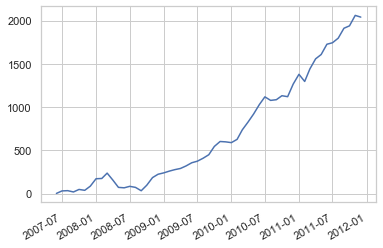

In [30]:
loan['issue_d'].value_counts().plot()

- We have plotted loans wrt issue date
- Loans have been issued from 2007 to 2011
- With the timeline No. of loans are increasing

# Segmented Univariate Analysis

In [31]:
#plotting default rate wrt various categories
non_defaulter = loan[loan['loan_status']==0]
defaulter = loan[loan['loan_status'] == 1]
def default_rate(f,x,y):
    d=defaulter.groupby(f)['loan_status'].count()
    nd=non_defaulter.groupby(f)['loan_status'].count()
    dr=(d/(d+nd))
    dr.sort_values(inplace=True)
    print(dr)
    fig=plt.figure(figsize=(x,y))
    sns.barplot(dr.index,dr)
    ax=plt.gca()
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
    fig.savefig('loan_bar_%s.png' % f)
    plt.xlabel(f)
    plt.ylabel('Default Rate')
    plt.show()


We have created a function which take feature and figure size (x,y) and plot default rate vs feature plot

term
 36 months    0.110909
 60 months    0.253138
Name: loan_status, dtype: float64


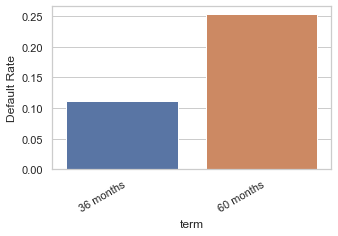

In [32]:
default_rate('term',5,3)

- We can see that there is approx 25% default in 60 months loan while only 10% default in 36 months loan
- Thus It is a strong indicator of default

home_ownership
MORTGAGE    0.136713
OWN         0.148908
RENT        0.153626
OTHER       0.178218
Name: loan_status, dtype: float64


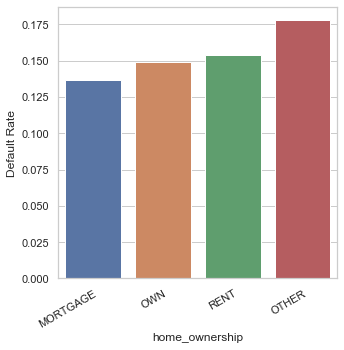

In [33]:
default_rate('home_ownership',5,5)

- From the above plot it is clear that people with Other category have highest default rate 
- Thus If an applicant has other as ownership of home we need to be extra careful

verification_status
Not Verified       0.128310
Source Verified    0.148186
Verified           0.168032
Name: loan_status, dtype: float64


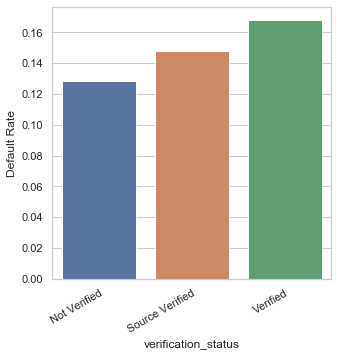

In [34]:
default_rate('verification_status',5,5)

- We need to notice that Verified applicants has more default than not verified
- It shows that we need to check our verification mechanism
- May be there is some wrong practice in that

grade
A    0.059930
B    0.122056
C    0.171943
D    0.219862
E    0.268494
F    0.326844
G    0.337793
Name: loan_status, dtype: float64


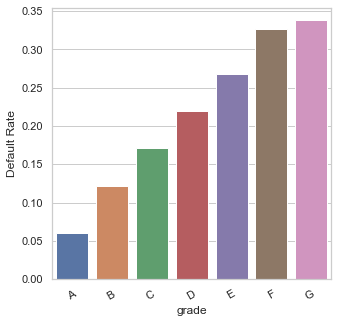

In [35]:
default_rate('grade',5,5)

- Grade is strong indicator of defaulter
- Grade A B C are safer loans
- While Other grades are a bit riskier

sub_grade
A1    0.026339
A2    0.049072
A3    0.056906
A4    0.061956
A5    0.079926
B1    0.095159
B2    0.113943
B3    0.120708
B4    0.135002
B5    0.136138
C1    0.163504
C2    0.166235
C4    0.175788
D1    0.179377
C5    0.180243
C3    0.181452
D2    0.210731
D3    0.229391
E3    0.230620
D4    0.234205
G4    0.240741
D5    0.250600
E2    0.265472
E1    0.274238
E5    0.281654
F3    0.293103
E4    0.297170
F1    0.298361
F2    0.300429
G1    0.329787
G5    0.344828
F4    0.350993
G2    0.363636
G3    0.422222
F5    0.477876
Name: loan_status, dtype: float64


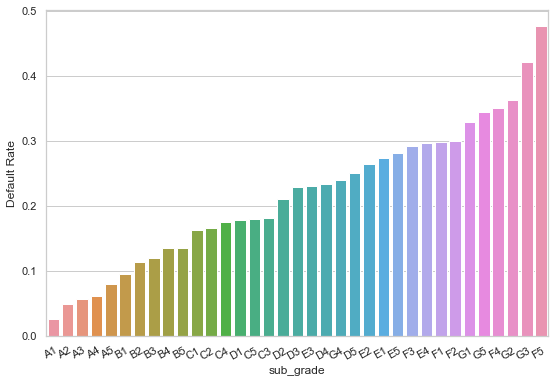

In [36]:
default_rate('sub_grade',9,6)

- Smilar like Grade, Subgrade is also strong indicator of defaulter
- F5, G3, G2 and so on are indicating high default


emp_length
9 years      0.128874
2 years      0.132137
4 years      0.138241
3 years      0.138335
8 years      0.141463
6 years      0.141605
< 1 year     0.141748
5 years      0.143394
1 year       0.143894
7 years      0.153711
10+ years    0.156810
Blank        0.220716
Name: loan_status, dtype: float64


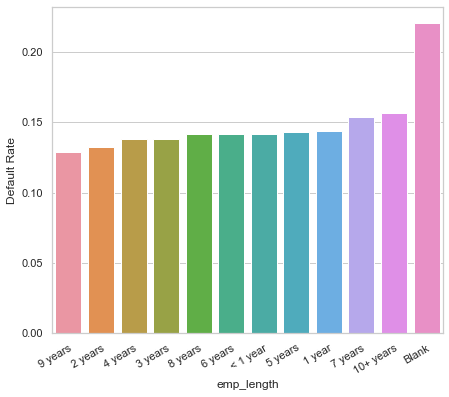

In [37]:
default_rate('emp_length',7,6)

- We find out that people who do not mention there employement length are defaulting more 
- May be they are not working or not getting regular income

purpose
major_purchase        0.103256
wedding               0.103672
car                   0.106738
credit_card           0.107818
home_improvement      0.120696
vacation              0.141333
debt_consolidation    0.153254
medical               0.155653
moving                0.159722
house                 0.160763
other                 0.163777
educational           0.172308
renewable_energy      0.186275
small_business        0.270810
Name: loan_status, dtype: float64


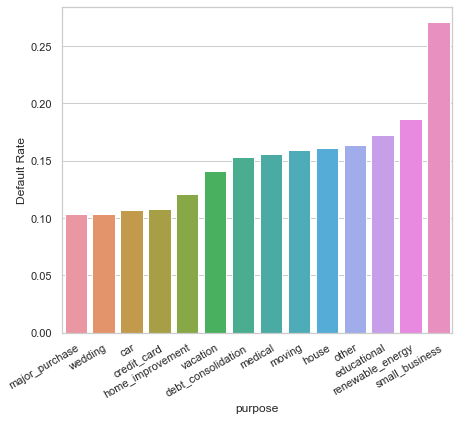

In [38]:
default_rate('purpose',7,6)

- We found that there is more default in ‘small_business’,’renewable_energy’ ‘education’ and so on.
- Intrestingly we also find if we compare frequencies ‘debt_cosolidation’ has most in default 
- We can say this is also a strong indicator of default

addr_state
WY    0.050000
DC    0.071090
MS    0.105263
DE    0.106195
VT    0.113208
AR    0.114894
TN    0.117647
TX    0.118842
KS    0.121569
WV    0.122093
MA    0.122591
PA    0.122616
LA    0.124122
AL    0.124138
CO    0.127937
RI    0.128866
VA    0.129291
CT    0.129477
OH    0.131579
MT    0.132530
IL    0.133288
NY    0.133856
MN    0.133884
OK    0.139373
WI    0.143182
SC    0.143791
KY    0.144695
AZ    0.144876
MI    0.146307
NH    0.150602
NC    0.152000
WA    0.155257
NJ    0.155307
GA    0.158205
MD    0.158358
UT    0.158730
CA    0.161894
OR    0.163218
NM    0.163934
ID    0.166667
HI    0.168675
MO    0.170149
FL    0.181230
AK    0.192308
SD    0.193548
NV    0.225470
NE    0.600000
IA         NaN
IN         NaN
ME         NaN
Name: loan_status, dtype: float64


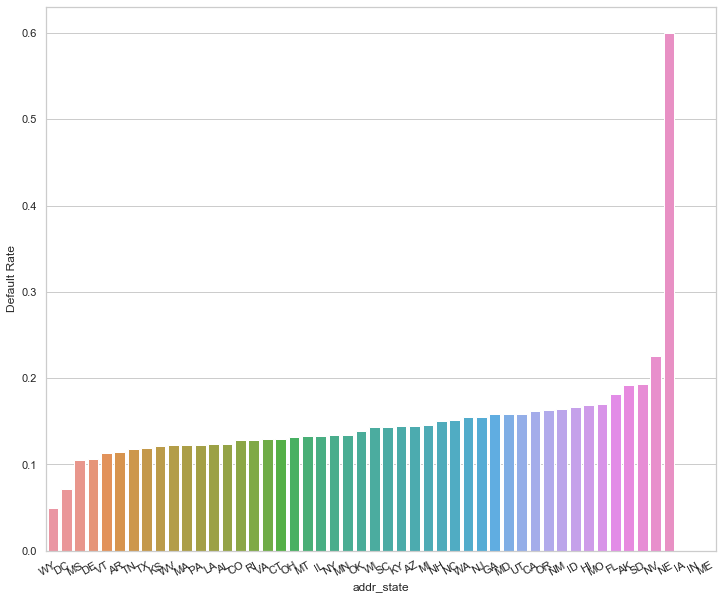

In [39]:
default_rate('addr_state',12,10)

- We can see that state NE has highest default percentage 
- while there is less default percentage for state WY.

In [40]:
loan['title'].value_counts()
#we can see that most of the titles are for debt consolidation with different spellings lets try to merge them

debt_consolidation                                                                   8485
personal loan                                                                         958
home improvement                                                                      526
personal                                                                              524
credit card loan                                                                      341
small business loan                                                                   327
loan                                                                                  303
home improvement loan                                                                 266
car loan                                                                              251
wedding loan                                                                          237
credit card payoff                                                                    214
consolidat

Fixing title column

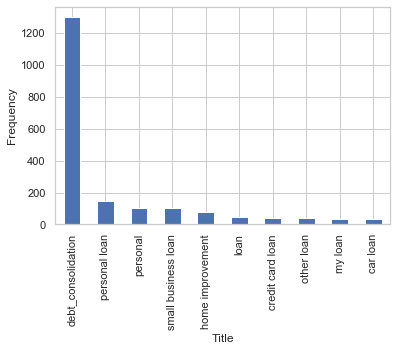

In [41]:
plt.xlabel('Title')
plt.ylabel('Frequency')
defaulter['title'].value_counts().nlargest(10).plot(kind='bar')

- There is a huge default for debt consolidation
- It is also a strong indicator of default

issue_year
2009    0.125954
2010    0.128772
2008    0.158131
2011    0.158705
2007    0.179283
Name: loan_status, dtype: float64


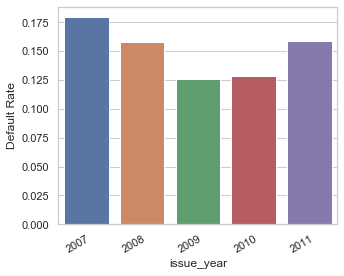

In [42]:
default_rate('issue_year',5,4)

- Highest default rate for loans issued in year 2007

issue_month
2     0.122986
3     0.128948
4     0.130696
1     0.134931
8     0.138135
7     0.142942
11    0.149276
6     0.151887
10    0.154214
9     0.156375
5     0.159644
12    0.160854
Name: loan_status, dtype: float64


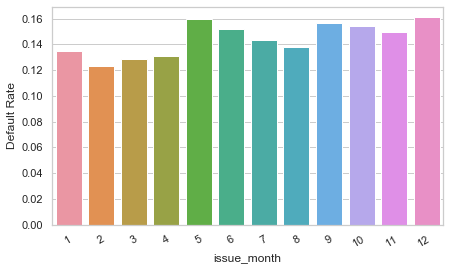

In [43]:
default_rate('issue_month',7,4)

- No Clear pattern for issued month

int_rate_cat
lower     0.066214
medium    0.147888
upper     0.261381
Name: loan_status, dtype: float64


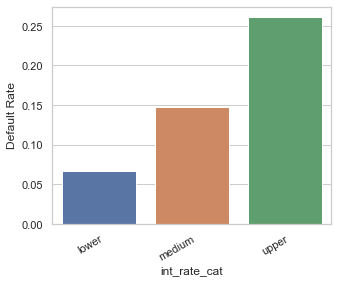

In [44]:
default_rate('int_rate_cat',5,4)

- There is highest default rate for interest rate above 15%
- As interest rate increases default rate also increasing
- This is also a good indicator of default

dti_cat
lower     0.125998
medium    0.151372
upper     0.167338
Name: loan_status, dtype: float64


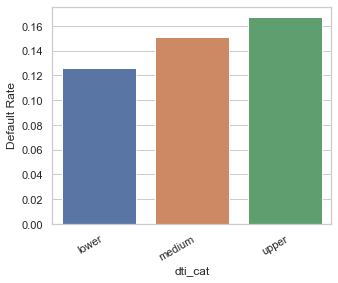

In [45]:
default_rate('dti_cat',5,4)

- Default rate is increasing with dti
- Showing that more debt more default or less saving more default

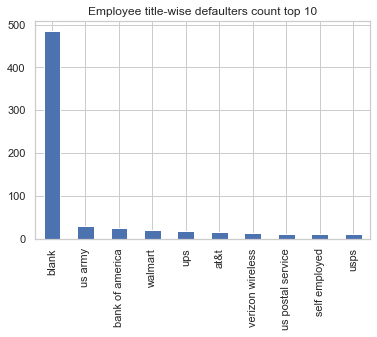

In [46]:
plt.title('Employee title-wise defaulters count top 10')
defaulter['emp_title'].value_counts().nlargest(10).plot(kind='bar')


# Bivariate Analysis

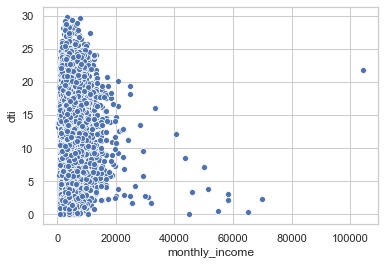

In [47]:
sns.scatterplot(defaulter['monthly_income'],defaulter['dti'])

lot of outliers are there

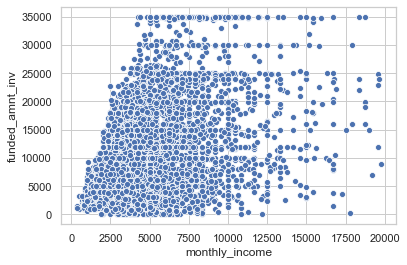

In [48]:
sns.scatterplot(defaulter.loc[loan['monthly_income']<20000,'monthly_income'],defaulter.loc[loan['monthly_income']<20000,'funded_amnt_inv'])

- We can see at the top of the graph
- We have given 35000 loan to the people with less income too

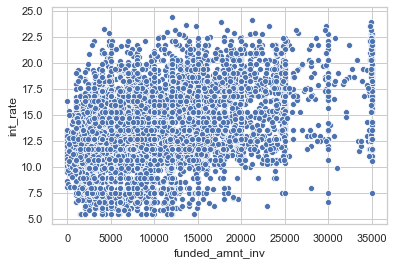

In [49]:
sns.scatterplot(defaulter['funded_amnt_inv'],defaulter['int_rate'])

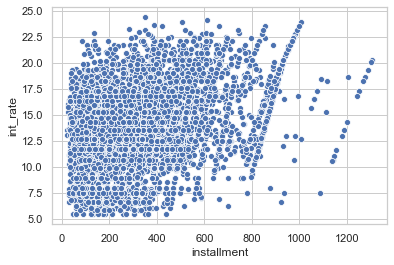

In [50]:
sns.scatterplot(defaulter['installment'],defaulter['int_rate'])

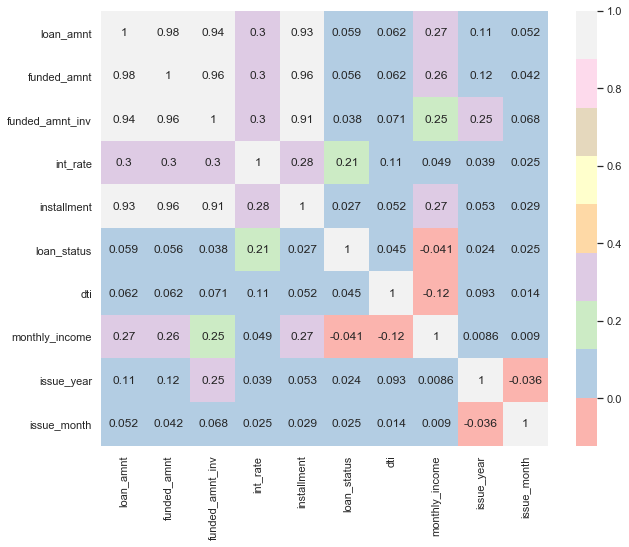

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(loan.corr(),cmap='Pastel1',annot=True)

- High correlation b/w loan_amnt and funded_amnt and funded_amnt_inv which is obvious
- Monthly income and dti has a negative correlation means if we increase monthly income dti will decrease
- Loan status has a good correlation with int_rate hence it is a good indicator
- Loan status has a small but negative correlation with monthly income
- More monthly income means more funded_amnt 

# Conclusions
- We need to check verification schemes 
- People more likely to default
    loan for debt_consolidation,small_business 
     Who does not mention employment length
    With Term 60 months
    Higher interest rate
    With Grades C,D,E,F and G 
    Subgrades F5,G2,G3 and so on 
    Home ownership as ‘other’

- Term, Grade, subgrade, purpose, title, int_rate, home_ownership are good indicators of default